In [6]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [9]:
# Read the uploaded dataset
df = pd.read_csv('heart.csv')

In [11]:
# Display dataset info
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
# Select numerical features
X = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
y = df['HeartDisease']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize and train KNN classifier with k=100
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [15]:
# Make predictions
y_pred = knn.predict(X_test)


In [16]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy without Standardization: {accuracy:.4f}')


Accuracy without Standardization: 0.6739


In [17]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Train KNN classifier again with standardized data
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

In [19]:
# Compute accuracy after standardization
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy after Standardization: {accuracy_scaled:.4f}')

Accuracy after Standardization: 0.7011


Best K Value: 19


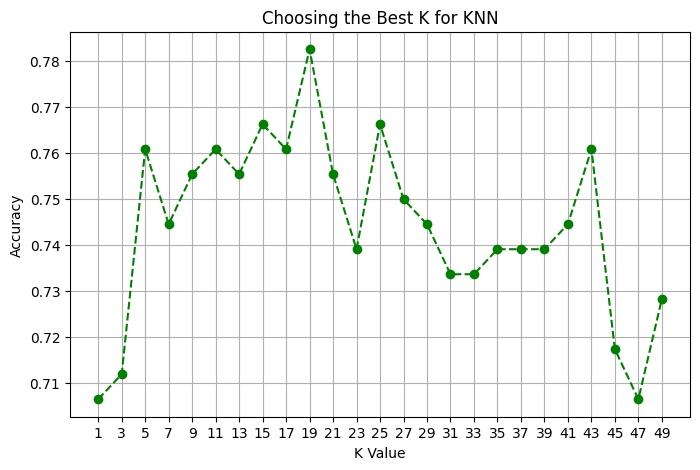

In [21]:
# Tune KNN by testing different k values
k_values = range(1, 50, 2)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Find the best k
best_k = k_values[np.argmax(accuracy_scores)]
print(f'Best K Value: {best_k}')

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='g')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K for KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()
